In [1]:
!pip install tsai sktime yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 66.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=290463 sha256=0ff5b99bf03333eda4d2f55181ebd000664a982282bc61be467112db7dccb9c2
  Stored in directory: /root/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee


In [2]:
from tsai.all import *
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')

# Exploratory Data Analysis

In [3]:
data = yf.download("NVDA")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376288,271468800
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415709,51048000
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383456,34320000
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382261,24436800
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381067,22752000
...,...,...,...,...,...,...
2023-10-16,450.630005,462.250000,449.119995,460.950012,460.950012,37509900
2023-10-17,440.000000,447.540009,424.799988,439.380005,439.380005,81233300
2023-10-18,425.910004,432.190002,418.250000,421.959991,421.959991,62729400


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6.228000e+03
mean,38.926146,39.653094,38.175124,38.941895,38.680517,6.110934e+07
std,80.631718,82.122744,79.051604,80.627207,80.642551,4.372755e+07
min,0.348958,0.355469,0.333333,0.341146,0.312976,1.968000e+06
25%,2.705000,2.796875,2.631875,2.710703,2.486869,3.454890e+07
50%,4.427500,4.500000,4.342500,4.423750,4.088279,5.126605e+07
75%,36.780000,37.653124,36.201251,36.866875,36.575160,7.429110e+07
max,502.160004,502.660004,489.579987,493.549988,493.509338,9.230856e+08


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6228 entries, 1999-01-22 to 2023-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6228 non-null   float64
 1   High       6228 non-null   float64
 2   Low        6228 non-null   float64
 3   Close      6228 non-null   float64
 4   Adj Close  6228 non-null   float64
 5   Volume     6228 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 340.6 KB


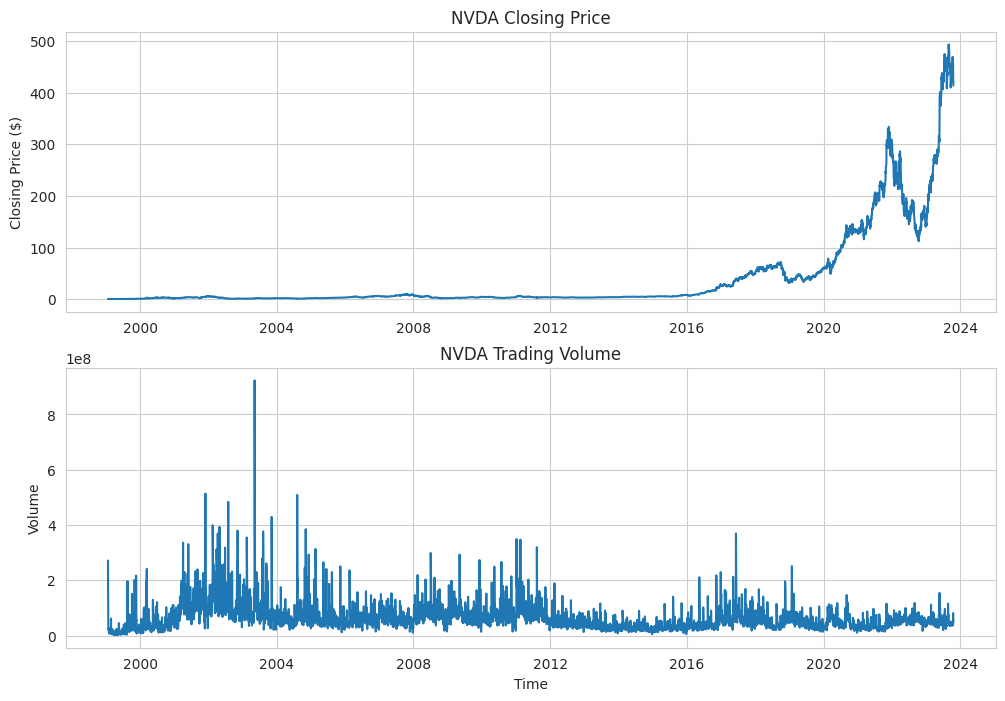

In [6]:
# Plot the closing price and sales volumes over time

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(data['Close'])
plt.title('NVDA Closing Price')
plt.ylabel('Closing Price ($)')

plt.subplot(2, 1, 2)
plt.plot(data['Volume'])
plt.title('NVDA Trading Volume')
plt.ylabel('Volume')

plt.xlabel('Time')
plt.show()

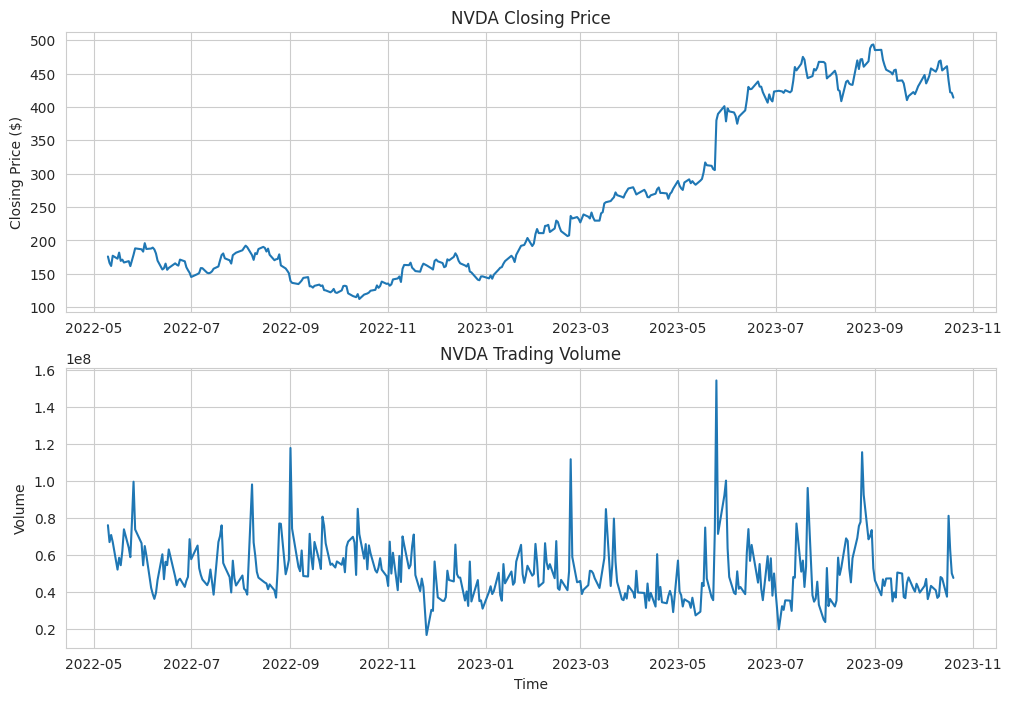

In [7]:
# Same plot but only for the last 365 days

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(data['Close'][-365:])
plt.title('NVDA Closing Price')
plt.ylabel('Closing Price ($)')

plt.subplot(2, 1, 2)
plt.plot(data['Volume'][-365:])
plt.title('NVDA Trading Volume')
plt.ylabel('Volume')

plt.xlabel('Time')
plt.show()

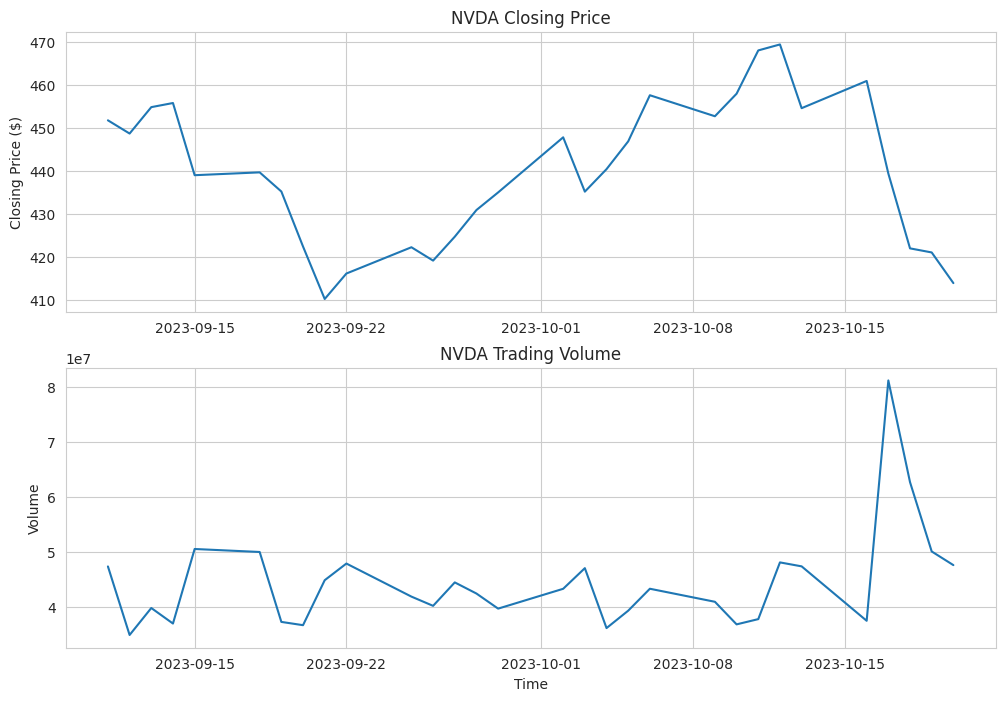

In [8]:
# Same plot but only for the last 30 days

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(data['Close'][-30:])
plt.title('NVDA Closing Price')
plt.ylabel('Closing Price ($)')

plt.subplot(2, 1, 2)
plt.plot(data['Volume'][-30:])
plt.title('NVDA Trading Volume')
plt.ylabel('Volume')

plt.xlabel('Time')
plt.show()

# Training

We limits our dataset to only after 2016 since there were no significant changes in the data before 2020.

In [9]:
# Filter data before 2016
data = data[data.index > '2016-01-01']

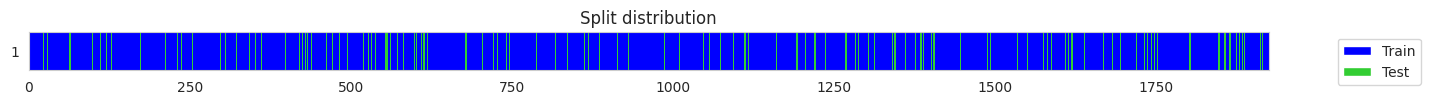

X      - shape: [1925 samples x 6 features x 30 timesteps]  type: ndarray  dtype:float64  isnan: 0
y      - shape: (1925, 10)  type: ndarray  dtype:float64  isnan: 0
splits - n_splits: 2 shape: [1733, 192]  overlap: False


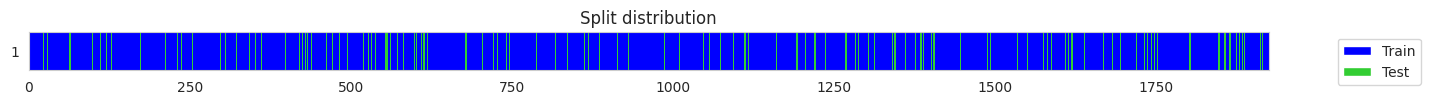

In [10]:
from tsai.all import *

window_length = 30 # use 30 days of historical data to make the prediction
horizon = 10 # predict the next 10 days

# Set up a multivariate time series regression problem, all the columns except the date are used as features to predict the closing price
X, y = SlidingWindow(window_length, horizon=horizon, get_y='Close')(data)
splits = get_splits(y, valid_size=0.1, random_state=42, shuffle=True)

tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=True, by_var=True) # normalize each sample and variable separately
check_data(X, y, splits)

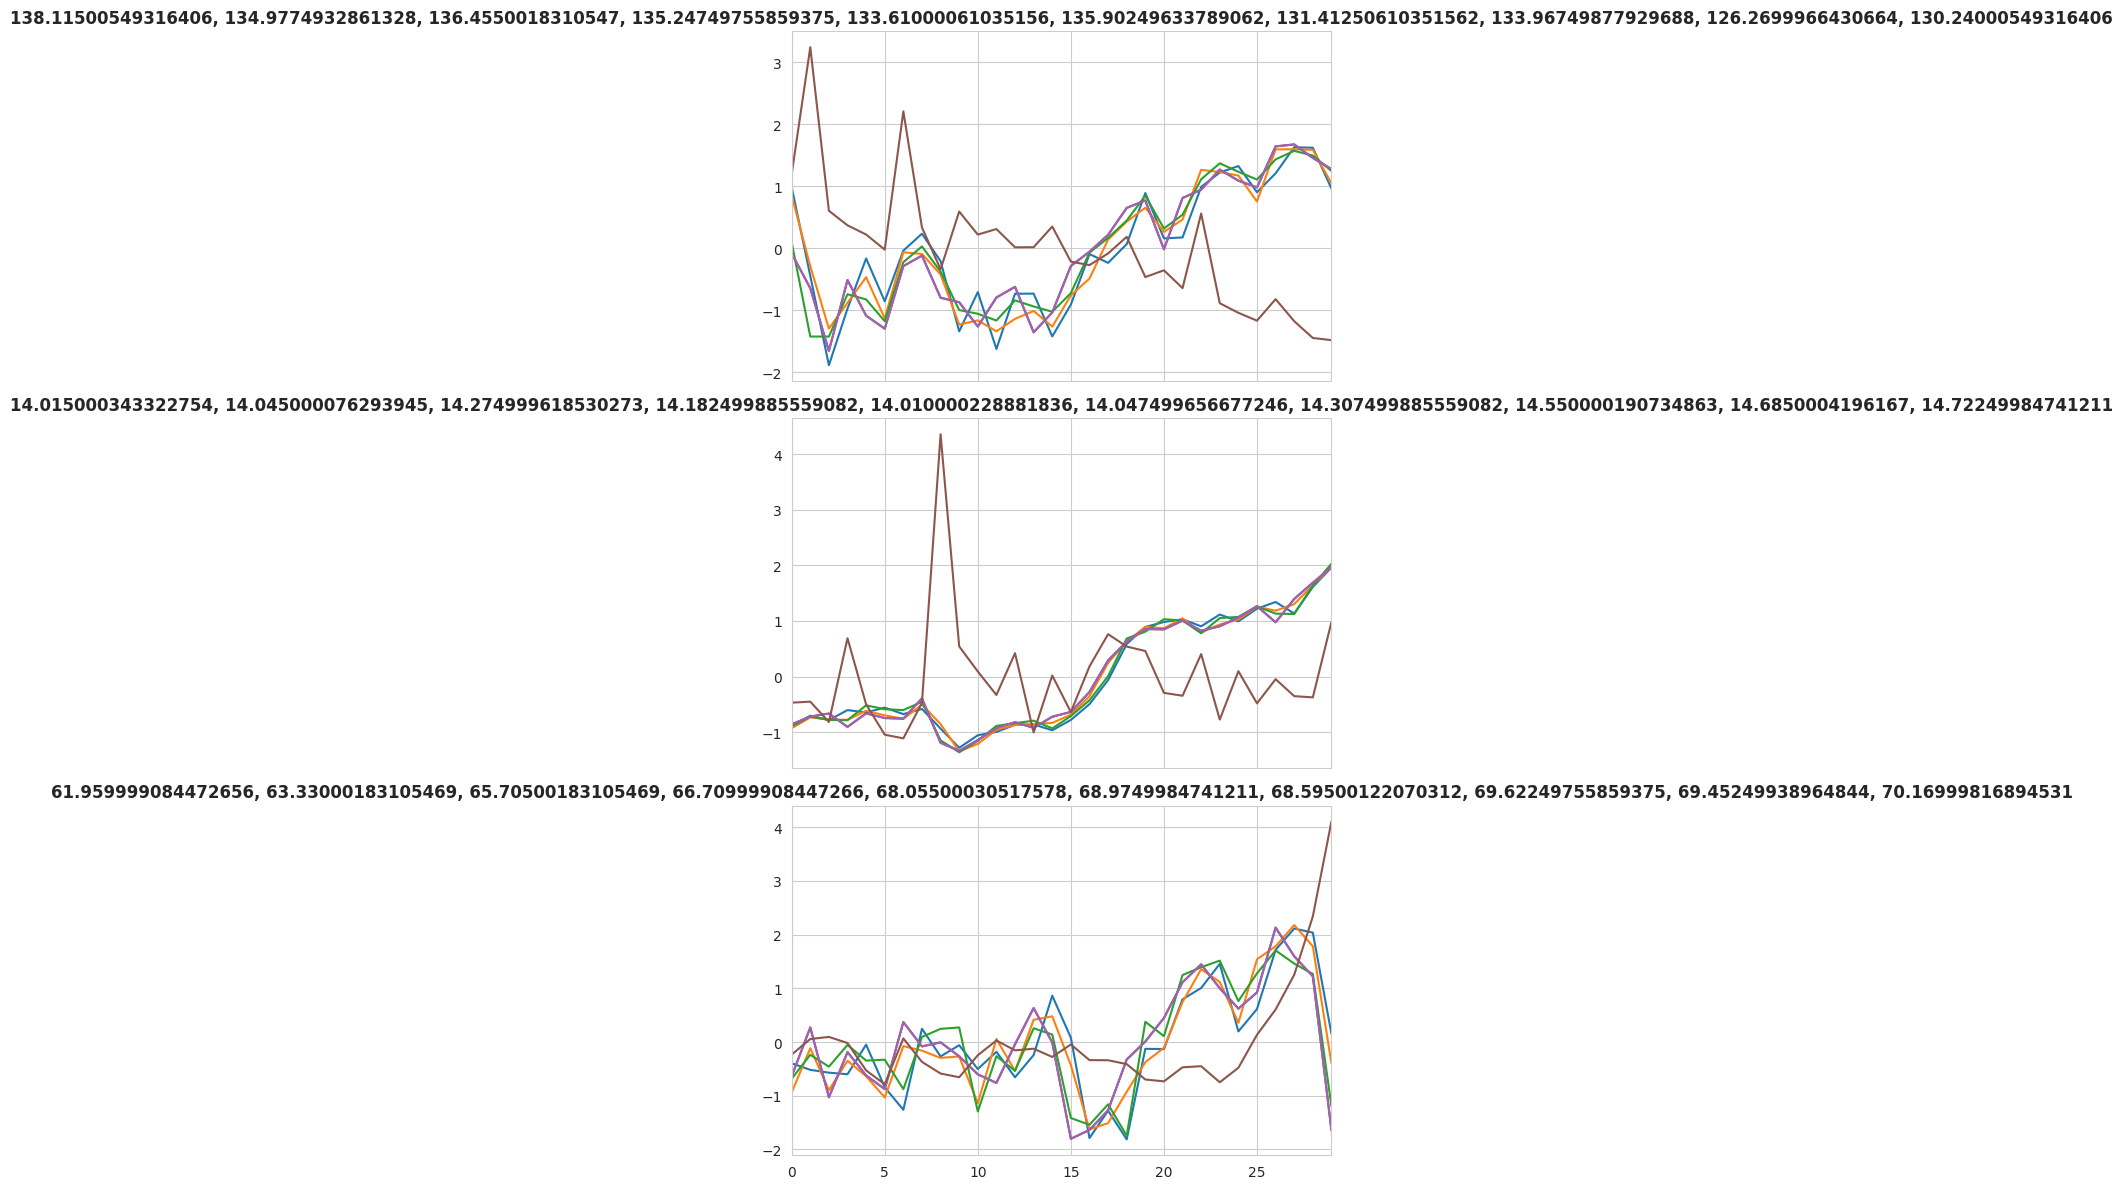

In [11]:
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
dls.show_batch(max_n=3)

In [12]:
dls.c = horizon
model = LSTM(dls.vars, dls.c)
model

LSTM(
  (rnn): LSTM(6, 100, batch_first=True)
  (dropout): Identity()
  (fc): Linear(in_features=100, out_features=10, bias=True)
)

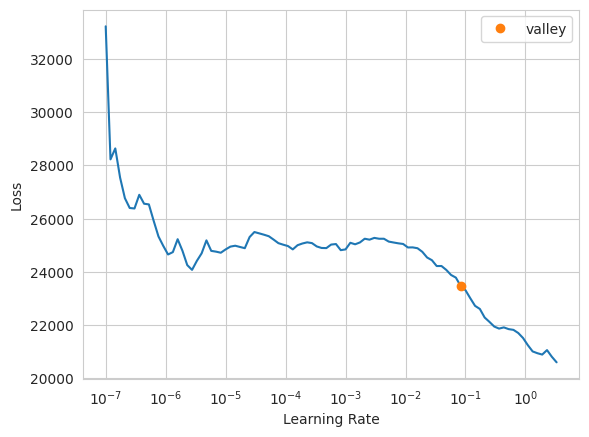

In [13]:
learn = ts_learner(dls, model, metrics=[rmse], cbs=ShowGraph())
suggested_lr = learn.lr_find()

epoch,train_loss,valid_loss,_rmse,time
0,24867.476562,26839.310547,163.827072,00:00
1,24017.400391,24930.234375,157.893097,00:01
2,22747.308594,21971.431641,148.227646,00:01
3,21095.480469,18104.042969,134.551270,00:00
4,19028.482422,14572.207031,120.715401,00:00
5,17043.070312,12690.713867,112.653061,00:00
6,15568.426758,12347.370117,111.118713,00:00
7,14491.961914,12339.598633,111.083748,00:00
8,13768.903320,12413.034180,111.413795,00:00
9,13206.814453,12399.491211,111.352997,00:00


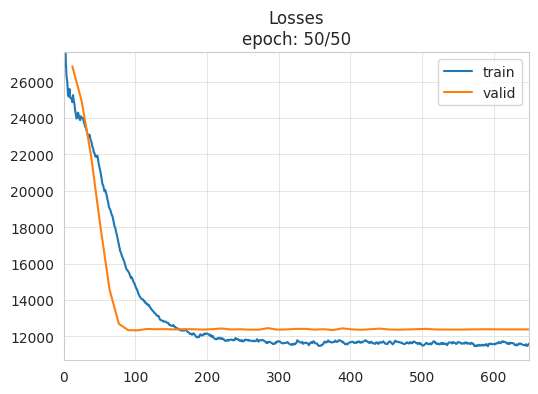

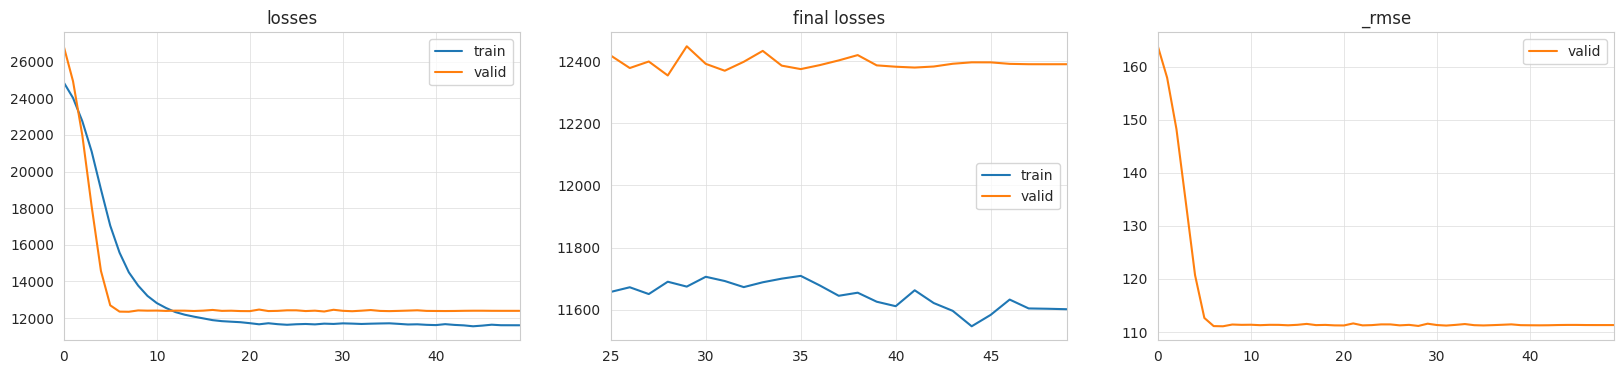

In [14]:
learn.fit_one_cycle(50, suggested_lr)

# Inference

In [15]:
X_test = np.array(data[-30:]).reshape(1, -1, window_length) # use the last 30 days as the test set, we want to predict the future price of the next 10 days
y_test, _, _ = learn.get_X_preds(X_test, with_decoded=True)

In [16]:
df_submission = pd.DataFrame(y_test[0], columns=['Close'])
df_submission.index.name = 'index'
df_submission

,Close
index,
0,115.707878
1,115.933525
2,116.090141
3,116.316612
4,116.556252
5,116.754028
6,116.939392
7,117.149162
8,117.329796


In [17]:
df_submission.to_csv("submission.csv")